In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise

Write a Metropolis sampler that takes two arguments: `p`, a list or array of (possibly un-normalized) probabilities, and `n`, a sample size, and returns a sample (in the form of a NumPy array) generated by the following approach to the Metropolis algorithm:
* Start in a randomly chosen initial state
* At each step, flip a coin to decide whether to propose the next state or the previous one
* Accept the proposal with probability `p[proposed state] / p[current state]`.

In [ ]:
def metropolis(p, n):


### Checking the results

Here, we'll use a metric called *Kullback-Leibler divergence* to measure the fit of our generated probability distribution to the target distribution. First, let's draw a sample and make a histogram, though. Try varying the sample size to see how the results change.

In [14]:
target = np.array([18, 90, 240, 120, 128, 233, 76])
target_density = target / sum(target)
size = 5000

In [16]:
sample = metropolis(target, size)

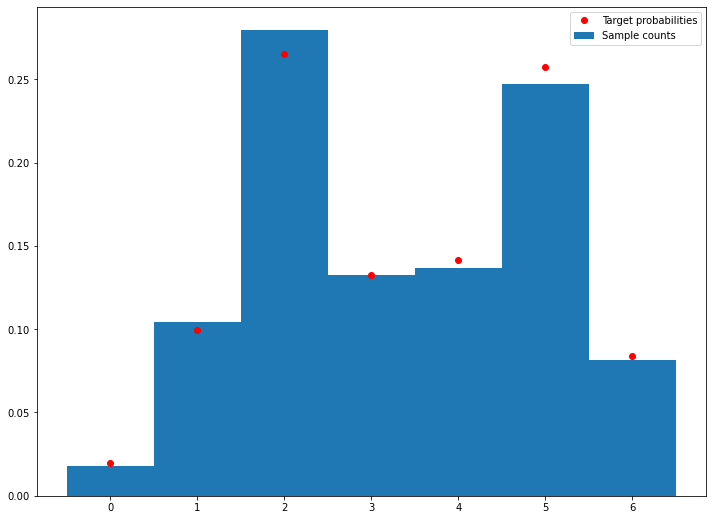

In [17]:
plt.figure(figsize=(12, 9))
plt.hist(sample, bins = np.arange(len(target) + 1) - 0.5, density = True, label = 'Sample counts')
plt.xticks(np.arange(len(target)))
plt.plot(np.arange(len(target)), target_density, 'ro', label = 'Target probabilities')
plt.legend()
plt.show()

The Kullback-Leibler divergence is a measurement of "distance" between two probability distributions, and we can use it as a metric for how well we are approximating the target distribution. Given two distributions $p, q$ on a discrete set of outcomes, we can calculate the KL divergence as:

$$ D_{KL} (p, q) = \sum_i p_i \log_2 \left(\frac{p_i}{q_i}\right) $$

Here we think of $p$ as the target distribution and $q$ as our sample. If $p_i = q_i$ for all $i$, then $D_{KL} (p, q) = 0$; otherwise it is positive. If our sampler is working, the divergence should decay as we get a larger sample.

In [18]:
def kld(target, sample):
    sample_dist = np.array([np.sum(sample == i) for i in range(len(target))]) / len(sample)
    # sample_dist += 1e-6 Can uncomment this to avoid division by zero
    target = np.array(target)
    target = target / np.sum(target)
    
    return np.sum([target[i] * np.log2(target[i] / sample_dist[i]) for i in range(len(target))])

In [19]:
size = 5000
sample = metropolis(target, size)

In [20]:
kld(target, sample)

0.00035872619990923605

To check convergence of the sampler, let's plot the KL divergence of our sample from the target distribution as we draw more samples.

<ipython-input-18-1eabeb1e91c6>:7: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sum([target[i] * np.log2(target[i] / sample_dist[i]) for i in range(len(target))])


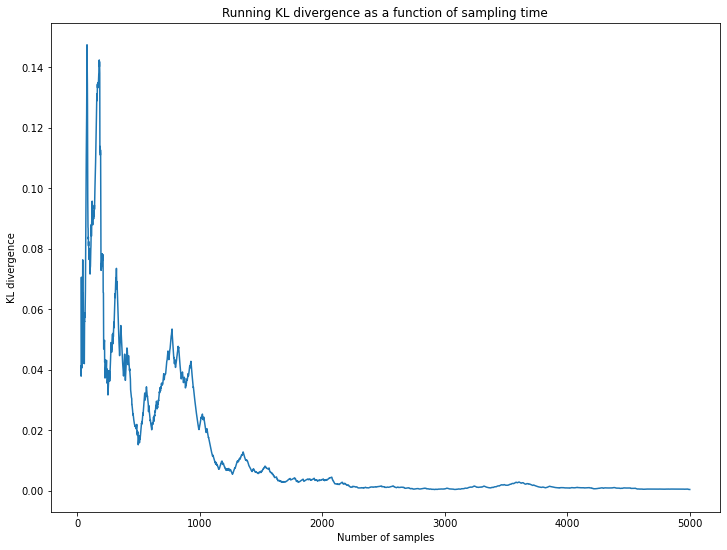

In [21]:
# Compute a running KL divergence of the first i samples from the target distribution. We'll get some divide-by-zero errors from early runs, which is ok.
kld_history = [kld(target, sample[:i]) for i in range(1, len(sample))]
plt.figure(figsize=(12, 9))
plt.title('Running KL divergence as a function of sampling time')
plt.xlabel('Number of samples')
plt.ylabel('KL divergence')
plt.plot(range(1,len(sample)), kld_history)
plt.show()

In [ ]:
# Same thing, but take a running "window" of our sample
width = 1000
moving_kld_history = [kld(target, sample[i-width:i+width]) for i in range(width + 1, len(sample) - width)]
plt.figure(figsize=(12, 9))
plt.title('Running window divergence as a function of sampling time')
plt.xlabel('Center of window')
plt.ylabel('KL divergence')
plt.plot(250 + np.arange(len(moving_kld_history)), moving_kld_history)

In [ ]:
# Inspect the sample trace to look for "sticky" spots
plt.figure(figsize=(12, 9))
plt.plot(np.arange(len(sample)), sample)
plt.show()